<a href="https://colab.research.google.com/github/deepakk177/ML---Lab-Programs-MTech-AI-2025-/blob/main/Machine_Learning_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab 8 : K-Modes**
**Name :** Deepak Singh Porte

**Scholar Number :** 25215011122

Question 1 — K-Modes Clustering on a Categorical Dataset

Dataset: Adult Income Dataset (adult.csv)

Task:
Apply K-Modes clustering to group individuals based on categorical socioeconomic attributes.

	1.	Import the Adult Income dataset and preprocess it by:
	•	Selecting categorical features such as workclass, education, marital-status, and occupation.
	2.	Use the K-Modes algorithm to cluster the dataset.
	3.	Determine the optimal number of clusters using the cost function plot.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [ ]:
data = pd.read_csv("/content/adult.csv")
print("Dataset preview:\n", data.head())

Dataset preview:
    age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356             

In [ ]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation']
df = data[categorical_features].dropna()
print("\nSelected Features:\n", df.head())


Selected Features:
   workclass     education marital.status         occupation
0         ?       HS-grad        Widowed                  ?
1   Private       HS-grad        Widowed    Exec-managerial
2         ?  Some-college        Widowed                  ?
3   Private       7th-8th       Divorced  Machine-op-inspct
4   Private  Some-college      Separated     Prof-specialty


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 65395.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 61614.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 58334.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1401, cost: 53962.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/1

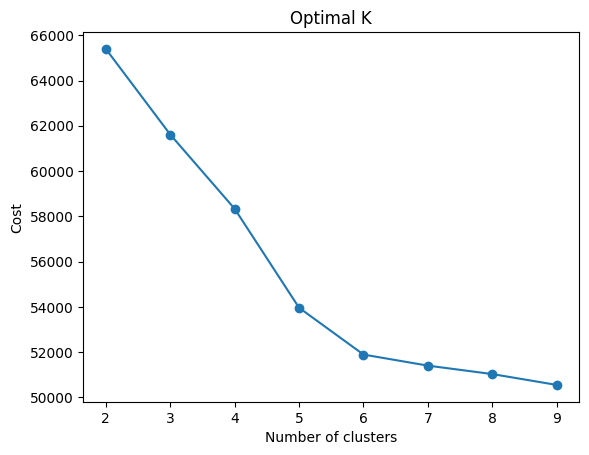

In [ ]:
cost = []
K = range(2, 10)

for num_clusters in K:
    km = KModes(n_clusters=num_clusters, init="Cao", n_init=5, verbose=1)
    km.fit_predict(df)
    cost.append(km.cost_)

plt.plot(K, cost, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Optimal K')
plt.show()

In [ ]:
optimal_k = 5
km = KModes(n_clusters=optimal_k, init="Cao", n_init=5, verbose=1)
clusters = km.fit_predict(df)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1401, cost: 53962.0


In [ ]:
df['Cluster'] = clusters
print(df.head())

print("\nCluster centroids:")
print(km.cluster_centroids_)

  workclass     education marital.status         occupation  Cluster
0         ?       HS-grad        Widowed                  ?        0
1   Private       HS-grad        Widowed    Exec-managerial        0
2         ?  Some-college        Widowed                  ?        1
3   Private       7th-8th       Divorced  Machine-op-inspct        2
4   Private  Some-college      Separated     Prof-specialty        0

Cluster centroids:
[['Private' 'HS-grad' 'Married-civ-spouse' 'Prof-specialty']
 ['Private' 'Some-college' 'Never-married' 'Craft-repair']
 ['Private' 'Bachelors' 'Divorced' 'Exec-managerial']
 ['Private' 'Some-college' 'Married-civ-spouse' 'Exec-managerial']
 ['Private' 'HS-grad' 'Never-married' 'Other-service']]


Question 2 — Bisecting K-Means on a Numerical Dataset

Dataset: Mall Customers Dataset (mall_customers.csv)

Task:
Apply Bisecting K-Means clustering to segment customers based on their annual income and spending behavior.

	1.	Import the dataset and standardize numerical features such as Annual Income (k$) and Spending Score (1–100).
	2.	Perform clustering using Bisecting K-Means.
	3.	Compare the results with traditional K-Means using:
	•	Silhouette score
	4.	Visualize both clustering results using 2D scatter plots.

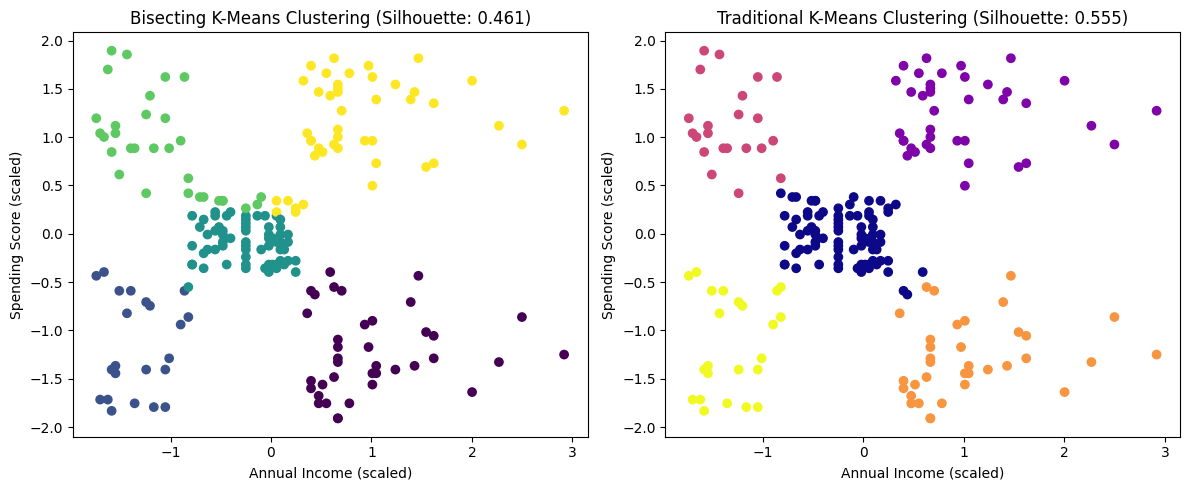

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Mall_Customers_2.csv.xls")
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def bisecting_kmeans(X, k):
    clusters = [X]
    labels = np.zeros(X.shape[0], dtype=int)
    while len(clusters) < k:
        largest_cluster_idx = np.argmax([len(c) for c in clusters])
        largest_cluster = clusters.pop(largest_cluster_idx)
        km = KMeans(n_clusters=2, random_state=42, n_init=10).fit(largest_cluster)
        new_labels = km.labels_
        new_clusters = [largest_cluster[new_labels == i] for i in range(2)]
        for i in range(2):
            clusters.append(new_clusters[i])
        label_offset = max(labels) + 1
        cluster_mask = (labels == largest_cluster_idx)
        labels[cluster_mask] = np.where(new_labels == 0, largest_cluster_idx, label_offset)
    final_labels = np.zeros(X.shape[0], dtype=int)
    idx = 0
    for i, cluster in enumerate(clusters):
        size = len(cluster)
        indices = np.arange(X.shape[0])[np.all(np.isin(X, cluster), axis=1)]
        final_labels[indices] = i
        idx += size
    return final_labels

k = 5
bisect_labels = bisecting_kmeans(X_scaled, k)
bisect_score = silhouette_score(X_scaled, bisect_labels)

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=bisect_labels, cmap='viridis')
plt.title(f'Bisecting K-Means Clustering (Silhouette: {bisect_score:.3f})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='plasma')
plt.title(f'Traditional K-Means Clustering (Silhouette: {kmeans_score:.3f})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.tight_layout()
plt.show()